In [7]:
import pandas as pd
import matplotlib.pyplot as plt

rcParams = {'font.size': 16 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Return_Continuous_Fragments(filepath, length_path):
    df = pd.read_csv(filepath, sep = '\t', skiprows=1, 
                     names = ['Start','End','Gaps','Length','QCover','Pident','Orient','ContigID'])
    df_len = pd.read_csv(length_path, sep = '\t', names = ['ContigID','Len','1','2','3','4'])
    del df_len['1'], df_len['2'], df_len['3'], df_len['4']
    df_temp = pd.merge(df, df_len, on = 'ContigID', how = 'right')
    df_temp = df_temp.fillna(-1)
    df_temp = df_temp[df_temp['Start'] == -1]
    print(df_temp['Len'].min(), df_temp['Len'].max(), len(df_temp), df_temp['Len'].sum())
    
    
    Cont_Fragments = []
    start, end = df.iloc[0]['Start'], df.iloc[0]['End']
    gaps = df.iloc[0]['Gaps']
    for i in range(1, len(df)):
        if gaps <= 0:
            #print('Merging', df.iloc[i]['Start'], df.iloc[i]['End'])
            end = df.iloc[i]['End']
        else:
            #print('--->',start,end)
            Cont_Fragments.append((start, end))
            start, end = df.iloc[i]['Start'], df.iloc[i]['End']
        gaps = df.iloc[i]['Gaps']
    return Cont_Fragments

In [4]:
filedir = 'Mount/Hot_Springs_Analysis/OSA_OSB_Ressembly_Mummer/'

print('MS50')
MS50_OSA = Return_Continuous_Fragments(filedir+'MS50/OSA/MS50_OSA.tiling', 
                                       'Mount-2/MS50_megahit_assembled_contigs_osa/MS50_osa.contigs.fa.fai')
MS50_OSB = Return_Continuous_Fragments(filedir+'MS50/OSB/MS50_OSB.tiling',
                                      'Mount-2/MS50_megahit_assembled_contigs_osb/MS50_osb.contigs.fa.fai')

print('MS55')
MS55_OSA = Return_Continuous_Fragments(filedir+'MS55/OSA/MS55_OSA.tiling',
                                       'Mount-2/MS55_megahit_assembled_contigs_osa/MS55_osa.contigs.fa.fai')
MS55_OSB = Return_Continuous_Fragments(filedir+'MS55/OSB/MS55_OSB.tiling',
                                      'Mount-2/MS55_megahit_assembled_contigs_osb/MS55_osb.contigs.fa.fai')

print('MS60')
MS60_OSA = Return_Continuous_Fragments(filedir+'MS60/OSA/MS60_OSA.tiling',
                                      'Mount-2/MS60_megahit_assembled_contigs_osa/MS60_osa.contigs.fa.fai')
MS60_OSB = Return_Continuous_Fragments(filedir+'MS60/OSB/MS60_OSB.tiling',
                                      'Mount-2/MS60_megahit_assembled_contigs_osb/MS60_osb.contigs.fa.fai')

print('MS65')
MS65_OSA = Return_Continuous_Fragments(filedir+'MS65/OSA/MS65_OSA.tiling',
                                      'Mount-2/MS65_megahit_assembled_contigs_osa/MS65_osa.contigs.fa.fai')
MS65_OSB = Return_Continuous_Fragments(filedir+'MS65/OSB/MS65_OSB.tiling',
                                      'Mount-2/MS65_megahit_assembled_contigs_osb/MS65_osb.contigs.fa.fai')


MS50
200 7882 13937 6351507
200 3972 37437 11636485
MS55
200 33573 12825 6728873
200 11038 30143 11121344
MS60
200 25322 12611 6987624
200 11297 23344 10144548
MS65
200 23260 14248 6428399
200 11457 8962 5917867


In [5]:
OSA_Len = 2932766
OSB_Len = 3046682

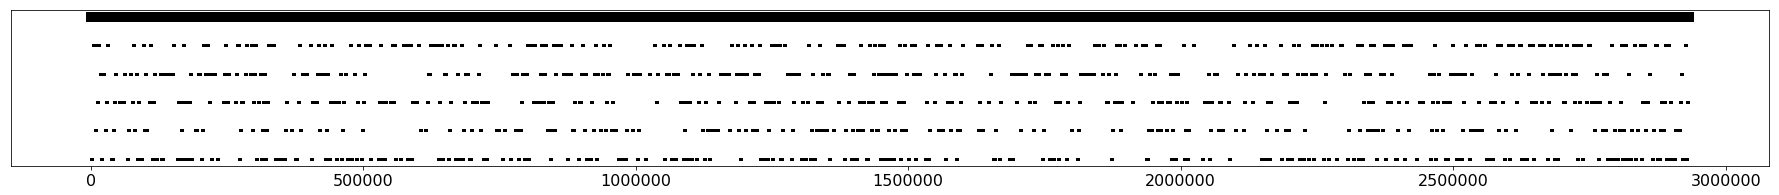

In [9]:
fig,ax = plt.subplots(1,1,figsize = (25,3))
ctr = 0
l=5
ax.plot([0,OSA_Len],[l,l], linewidth = 10, color = 'black')
for c in MS50_OSA:
    #ax.plot([c[0], c[1]], [l-0.5,l-0.5], color = 'red', linewidth = 5)
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black', linewidth=3)
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
#ax.set_title('MS50 OSA')
fig.tight_layout()
fig.savefig('fig-1.png',transparent=True, dpi = 100)

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (20,4))
ctr = 0
l=4
ax.plot([0,OSA_Len],[l,l], linewidth = 10, color = 'black')
for c in MS55_OSA:
    ax.plot([c[0], c[1]], [l-0.5, l-0.5], color = 'red')
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black')
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
ax.set_title('MS55 OSA')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/MS55-OSA-Assembly-Mapping.png')

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (20,4))
ctr = 0
l=4
ax.plot([0,OSA_Len],[l,l], linewidth = 10, color = 'black')
for c in MS60_OSA:
    ax.plot([c[0], c[1]], [l-0.5, l-0.5], color = 'red')
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black')
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
ax.set_title('MS60 OSA')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/MS60-OSA-Assembly-Mapping.png')

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (20,4))
ctr = 0
l=4
ax.plot([0,OSA_Len],[l,l], linewidth = 10, color = 'black')
for c in MS65_OSA:
    ax.plot([c[0], c[1]], [l-0.5, l-0.5], color = 'red')
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black')
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
ax.set_title('MS65 OSA')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/MS65-OSA-Assembly-Mapping.png')

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (20,4))
ctr = 0
l=4
ax.plot([0,OSB_Len],[l,l], linewidth = 10, color = 'black')
for c in MS50_OSB:
    ax.plot([c[0], c[1]], [l-0.5, l-0.5], color = 'red')
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black')
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
ax.set_title('MS50 OSB')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/MS50-OSB-Assembly-Mapping.png')

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (20,4))
ctr = 0
l=4
ax.plot([0,OSB_Len],[l,l], linewidth = 10, color = 'black')
for c in MS55_OSB:
    ax.plot([c[0], c[1]], [l-0.5, l-0.5], color = 'red')
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black')
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
ax.set_title('MS55 OSB')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/MS55-OSB-Assembly-Mapping.png')

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (20,4))
ctr = 0
ax.plot([0,OSB_Len],[l,l], linewidth = 10, color = 'black')
for c in MS60_OSB:
    ax.plot([c[0], c[1]], [l-0.5, l-0.5], color = 'red')
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black')
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
ax.set_title('MS60 OSB')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/MS60-OSB-Assembly-Mapping.png')

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (20,4))
ctr = 0
ax.plot([0,OSB_Len],[l,l], linewidth = 10, color = 'black')
for c in MS65_OSB:
    ax.plot([c[0], c[1]], [l-0.5, l-0.5], color = 'red')
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black')
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
ax.set_title('MS65 OSB')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/MS65-OSB-Assembly-Mapping.png')

In [ ]:
len(MS50_OSA), len(MS50_OSB)

In [ ]:
len(MS55_OSA), len(MS55_OSB)

In [ ]:
len(MS60_OSA), len(MS60_OSB)

In [ ]:
len(MS65_OSA), len(MS65_OSB)

In [ ]:
MS50_OSA